In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from networkx.algorithms import bipartite
import networkx as nx
import matplotlib.pyplot as plt
from itertools import chain


In [0]:
import json
with open("Musical_Instruments.json") as f:
  review_json_data = [json.loads(line) for line in f]


In [0]:
AppliancesDf = pd.DataFrame(review_json_data)
rating_data = AppliancesDf[['asin','overall', "reviewerID", "unixReviewTime", "reviewTime"]]

In [8]:
rating_data

,asin,overall,reviewerID,unixReviewTime,reviewTime
0,0470536454,5.0,AXHY24HWOF184,1092009600,"08 9, 2004"
1,0470536454,4.0,A29OWR79AM796H,1491436800,"04 6, 2017"
2,0470536454,5.0,AUPWU27A7X5F6,1489449600,"03 14, 2017"
3,0470536454,4.0,A1N69A47D4JO6K,1487030400,"02 14, 2017"
4,0470536454,5.0,AHTIQUMVCGBFJ,1485648000,"01 29, 2017"
...,...,...,...,...,...
1512525,B01HJETSF2,5.0,A311NUWMD55WPO,1528675200,"06 11, 2018"
1512526,B01HJETSF2,4.0,AXJFL8T55OXJG,1528329600,"06 7, 2018"
1512527,B01HJETSF2,5.0,A1RHBI07JTQBER,1527984000,"06 3, 2018"
1512528,B01HJETSF2,5.0,A1V0G9QMGY1RGK,1527552000,"05 29, 2018"


In [9]:
import datetime

oldest_timestamp = datetime.datetime(2018,1,1).timestamp()

rating_data = rating_data.loc[rating_data['unixReviewTime'] > oldest_timestamp]
rating_data = rating_data.loc[rating_data['overall'] >= 4]
rating_data.reset_index(inplace=True, drop=True)
del rating_data["unixReviewTime"]
del rating_data["reviewTime"]
rating_data

,asin,overall,reviewerID
0,B00004UE29,5.0,A24ZXKD4BFYW9P
1,B00004UE29,5.0,A161UFH9JCNU1U
2,B00004UE29,5.0,AHY8U4448G6NW
3,B00004UE29,5.0,A1N19KG3I8V5UB
4,B00004UE29,5.0,A4N04MUG2PDOH
...,...,...,...
103386,B01HJETSF2,5.0,A311NUWMD55WPO
103387,B01HJETSF2,4.0,AXJFL8T55OXJG
103388,B01HJETSF2,5.0,A1RHBI07JTQBER
103389,B01HJETSF2,5.0,A1V0G9QMGY1RGK


In [10]:
len(rating_data['reviewerID'].unique())

78621

In [0]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(rating_data, test_size=0.1)

In [0]:
graph = nx.Graph()
for index, row in train_data.iterrows():
  if row["overall"] >= 4:
    graph.add_node(row["reviewerID"], bipartite="Users")
    graph.add_node(row["asin"], bipartite="Items")
    graph.add_edge(row["asin"], row["reviewerID"])

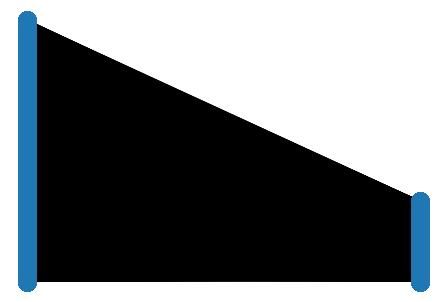

In [13]:
user_nodes = set()
item_nodes = set()
for key, value in nx.get_node_attributes(graph, 'bipartite').items():
  if value == "Users":
    user_nodes.add(key)
  else:
    item_nodes.add(key)

pos = {}

pos.update((node, (1, index)) for index, node in enumerate(user_nodes))
pos.update((node, (2, index)) for index, node in enumerate(item_nodes))

nx.draw(graph, pos=pos)
plt.show()


In [15]:
len(user_nodes)

72042

In [0]:
user_wise_recommendations = {}
min_common_item_reviewed = 4
from itertools import chain

for node in list(user_nodes):
  current_user = node
  
  items_rated_by_current_user = set(chain.from_iterable(graph.edges(current_user)))

  items_rated_by_current_user = items_rated_by_current_user.intersection(item_nodes)

  if len(items_rated_by_current_user) < min_common_item_reviewed:
    continue

  for user in list(user_nodes):
    if user == current_user:
      continue
    
    items_rated_by_this_user = set(chain.from_iterable(graph.edges(user)))
    items_rated_by_this_user = items_rated_by_this_user.intersection(item_nodes)
    
    if len(items_rated_by_this_user.intersection(items_rated_by_current_user)) >= min_common_item_reviewed and items_rated_by_this_user - items_rated_by_current_user:
      user_wise_recommendations.setdefault(node, set())
      user_wise_recommendations[node] = user_wise_recommendations[node].union(items_rated_by_this_user - items_rated_by_current_user)



In [20]:
user_wise_recommendations

{'A112F2QZ7F7YQC': {'B000068NTU',
  'B0002CZRTK',
  'B0002D01K4',
  'B0002D02RQ',
  'B0002D02SA',
  'B0002D02T4',
  'B0002D0C08',
  'B0002D0CEO',
  'B0002D0COE',
  'B0002D0E9M',
  'B0002D0ELU',
  'B0002DUVWC',
  'B0002E1G5C',
  'B0002E1J3Q',
  'B0002E1NNC',
  'B0002E1NQE',
  'B0002E1NWI',
  'B0002E2GMY',
  'B0002E2SA4',
  'B0002E3CHC',
  'B0002E3FB0',
  'B0002FO9QY',
  'B0002FOZCM',
  'B0002GIV1W',
  'B0002GIVF8',
  'B0002GW3Y8',
  'B0002GZ64M',
  'B0002GZ84K',
  'B0002GZSI6',
  'B0002H0A3S',
  'B0002KZDOG',
  'B0002KZIKU',
  'B0002KZIT6',
  'B0002KZRXS',
  'B0002Z3N8E',
  'B0006NDF8A',
  'B0006ZSTI4',
  'B0007Y09VO',
  'B0009EW1RM',
  'B000A2HOB6',
  'B000ARH3M6',
  'B000B5L4E0',
  'B000EEHMXA',
  'B000EEJAR6',
  'B000EEJAWQ',
  'B000EEL50Q',
  'B000H28IPA',
  'B000J5UEGQ',
  'B000L6GD04',
  'B000NKKHVE',
  'B000OLVXP6',
  'B000OMG0KI',
  'B000RPUMII',
  'B000UJFR4A',
  'B000WN4J9S',
  'B000Z36F06',
  'B00135HFK4',
  'B0018TC3I4',
  'B0019LQRT2',
  'B001F9LFMW',
  'B001G7UWIQ',
  'B00